# 卷积神经网络基础

## 1. 计算机视觉

随着深度学习的兴起，近些年来计算机视觉领域的发展十分迅猛。一方面，深度学习在计算机视觉的应用，使得很多几年前还无法解决的领域问题得以解决，比如人脸识别、自动驾驶；另一方面，在实践中计算机视觉社区对深度学习技巧的发现，也常常可以应用到其它领域里。

计算机视觉领域的典型问题，包括图片分类、物体检测、神经风格迁移等。

![Computer Vision Problems.png](img/Computer Vision Problems.png)

由于图像数据的特点（高分辨率，特征多），非常容易多拟合，同时针对图像数据训练模型也需要极大的计算资源。而要使用高分辨率的图片训练模型，最好要实现卷积，卷积是卷积神经网络的基本组成单元。

![Deep Learning on large images.png](img/Deep Learning on large images.png)

## 2. 边缘检测实例

在之前介绍的人类识别神经网络中，我们发现最终训练完成的神经网络会首先形成边缘检测的底层特征，在此基础上继续构建五官检测，进而再到人脸检测。可以说边缘检测是非常基础性的步骤。

![Computer Vision Problem.png](img/Computer Vision Problem.png)

卷积操作可以有效地进行边缘检测。卷积计算用到的这个3×3的矩阵，称为**过滤器 filter**，有些文献中也称为**核 kernel**。

![Vertical edge detection.png](img/Vertical edge detection.png)

卷积操作检测出来的边缘看起来比较粗，当输入图片的分辨率非常高时，这点损耗可以忽略不计。

![Vertical edge detection 2.png](img/Vertical edge detection 2.png)

## 3. 更多边缘检测的内容

上面提到的过滤器，还可以区分由浅到深的边缘和由深到浅的边缘。

![Vertical edge detection examples.png](img/Vertical edge detection examples.png)

而将这个过滤器的矩阵转置，就是水平边缘检测的过滤器。

![Vertical and Horizontal Edge Detection.png](img/Vertical and Horizontal Edge Detection.png)

除去水平边缘和垂直边缘过滤器外，计算机视觉社区还发明过Sober过滤器和Scharr过滤器，它们分别有一些自己的特性。而在深度学习时代，一个非常重要的理念是，过滤器本身可以作为神经网络的参数，在反向传播的过程中进行学习。这样最终学得的边缘检测过滤器，可能不限于水平或垂直边缘，而是可以检测任意倾斜的边缘。

![Learning to detect edges.png](img/Learning to detect edges.png)

## 4. 补全

经过卷积操作，图片的分辨率会降低。如果原图是n×n的矩阵，而过滤器是f×f的矩阵，卷积之后的矩阵就变为了(n-f+1)×(n-f+1)维。这样有两个坏处：1）随着每一层神经网络的卷积计算，图片的大小都在不断缩小，限制了训练过大的神经网络；2）角和边上的像素点，参与卷积计算的次数会更少，从而造成边角的信息利用率低。所以实际使用中，卷积通常伴随着补全。

![Padding.png](img/Padding.png)

根据使用补全的策略，区分**正确卷积 Valid convolution**和**同一卷积 Same convolution**。所谓正确卷积，就是不包含补全，任由图片大小缩减；而同一卷积，是先进行补全，使得最终输出的图片大小和输入一致。注意要同一卷积的要求，使得 $p=\frac{f-1}{2}$。这就要求过滤器是一个奇数维的矩阵，否则补全就需要是非对称的。过滤器是奇数维矩阵的另一个好处，是过滤器存在一个中心像素，方便定位位置。

![Valid and Same convolutions.png](img/Valid and Same convolutions.png)

## 5. 步长

前面看到的卷积操作，过滤器每次都只移动一格。而引入步长的概念之后，过滤器每次可以移动不只一格。

![Strided convolution.png](img/Strided convolution.png)

在有补全和步长的情况下，输出的数据量大小也会有所变化。

![Summary of convolutions.png](img/Summary of convolutions.png)

从严格数学的定义来说，实际上我们上面用到的应该称为**交叉相关性 cross-correlation**，而真正的卷积，在交叉相关性之前，还需要先进行垂直和水平的翻转，这样可以使得卷积服从结合律。不过这个特性对于神经网络意义不大（对于信号处理中使用卷积比较有用），所以在深度学习社区，实际上使用卷积时，并不会进行翻转，但是从命名习惯上，依然将其称之为卷积。

![Technical note on cross-correlation vs convolution.png](img/Technical note on cross-correlation vs convolution.png)

## 6. 高维空间的卷积

对于图片，如果要处理RGB值，就会有三个n×n的矩阵，形成一个n×n×3的立方体，这时相应的，过滤器也变成了一个f×f×3的立方体，最终输出仍然是一个矩阵。

![Convolutions on RGB image.png](img/Convolutions on RGB image.png)

在需要的情况下，也可以同时使用多个过滤器。

![Multiple filters.png](img/Multiple filters.png)

## 7. 一层卷积神经网络

![Example of a layer.png](img/Example of a layer.png)

![Summary of notation.png](img/Summary of notation.png)

## 8. 简单的卷积神经网络示例

一个39×39像素，RGB三通道表示的图片，经过三个卷积层，最后叠加一层logistic或softmax的卷机神经网络分类模型。注意到随着层数的增加，图片的像素在下降，而通道数在上升，这也是超参选择（每一层的过滤器大小f，过滤器数量$n_c$，步长s，补全p）的一个普遍趋势。

![Example ConvNet.png](img/Example ConvNet.png)

实际上，一个典型的卷积神经网络，除去卷积层之外，还会包含池化层(Pooling)，完全连接层(Fully connected)。下面会详细介绍。

## 9. 池化层

在过滤器区间内，取最大值，称为最大池化层。

![Pooling layer Max pooling.png](img/Pooling layer Max pooling.png)

池化层和卷积层的一个显著不同，是池化层的过滤器是针对通道独立的，不会跨通道取最大值。过滤器也包含两个超参，分别是f过滤器大小和步长s。注意和卷积层的另一个不同，是池化层的过滤器，只有超参，没有参数。所以在反向传播的过程中，这一层是没有更新的。

![Pooling layer Max pooling 2.png](img/Pooling layer Max pooling 2.png)

同时也有平均池化层，但平均池化层不常用。

![Pooling layer Average pooling.png](img/Pooling layer Average pooling.png)

## 10. 卷积神经网络实例

上面说到，池化层是没有需要学习的参数的，而且池化层通常会跟在一层或多层卷积层之后，所以习惯上会将卷积层和池化层一起称为神经网络的一层。而所谓的完全连接层FC，就是普通的神经网络的一层，有权重和截距作为参数。

下图是一个卷积-池化-卷积-池化-全连接-全连接-全连接-Softmax的卷积神经网络的例子。设计良好的卷积神经网络架构，每一层激活值的数量在前向传播的过程中，通常是逐渐递减的。

![Convolution Neural Network Example.png](img/Convolution Neural Network Example.png)

## 11. 为何卷积有效

卷积层相比全连接层，需要学习的参数大幅减少，有以下两个原因：
    - 参数共享：一个特征检测器（比如垂直边缘检测器），可能不只对图像的单一区域有效。过滤器平移的过程，就是参数共享的过程。
    - 连接的稀疏性：每一层的输出值都只依赖与几个输入值。（与全连接层相比，所有输入和所有输出都是连通的）
    
![Why convolutions.png](img/Why convolutions.png)

## 12. 卷积神经网络：一步一步地搭建卷积模型

这里我们将使用numpy来实现卷积神经网络的卷积层（CONV）和池化层（POOL），前向传播与反向传播。

**标记**:
- 上标 $[l]$ 表示第 $l^{th}$ 层的对应变量。 
    - 举例: $a^{[4]}$ 是第 $4^{th}$ 层激活层。 $W^{[5]}$ 和 $b^{[5]}$ 是第 $5^{th}$ 层的参数。


- 上标 $(i)$ 表示第 $i^{th}$ 个样本的对应变量。 
    - 举例: $x^{(i)}$ 是第 $i^{th}$ 个训练样本的输入。
    
    
- 下标 $i$ 表示向量的第 $i^{th}$ 个元素。
    - 举例: $a^{[l]}_i$ 表示第 $l$ 层的激活值的第 $i^{th}$ 个元素，假定这一层是全连接层（FC）。
    
    
- $n_H$, $n_W$ 和 $n_C$ 分别表示给定层的高度、宽度和通道数。当需要确定地表示是第 $l$ 层时，可以写作
$n_H^{[l]}$, $n_W^{[l]}$, $n_C^{[l]}$。
- $n_{H_{prev}}$, $n_{W_{prev}}$ 和 $n_{C_{prev}}$ 分别表示上一层的高度、宽度和通道数。当需要确定地表示是第 $l$ 层对应的前一层相应参数时，可以写作 $n_H^{[l-1]}$, $n_W^{[l-1]}$, $n_C^{[l-1]}$。

### 12.1 三方包

首先引入在这个编程练习中所需要的包。
- [numpy](www.numpy.org) 是Python生态圈中进行科学计算的基础包。
- [matplotlib](http://matplotlib.org) 是Python生态圈中著名的绘图包。
- np.random.seed(1) 用来保证所有函数调用中随机部分的一致性。

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

### 12.2 总览

我们将会实现卷积神经网络的各个组件：

- 卷积函数，包括：
    - 零补全 Zero Padding
    - 卷积窗口 Convolve window 
    - 前向卷积 Convolution forward
    - 反向卷积 Convolution backward (optional)
- 池化函数，包括:
    - 前向池化 Pooling forward
    - 创建掩码 Create mask 
    - 分布值 Distribute value
    - 反向池化 Pooling backward (optional)

这一节的内容都基于 `numpy` 从头开始实现；而在下一节中，我们会用Tensorflow来实现同样的模型。

<img src="img/model.png" style="width:800px;height:300px;">

**注意** 每一个前向传播的函数，都有对应的反向传播的函数。因此，前向传播模块中的每一步，都需要将相应的参数保存到缓存中。这些参数将在反向传播过程中用于计算梯度。

### 12.3 卷积神经网络

编程框架使得卷积非常容易使用，但卷积的概念依然是深度学习中最难理解的概念之一。卷积层将输入立方体转换为另一个尺寸的输出立方体，如下图所示：

<img src="img/conv_nn.png" style="width:350px;height:200px;">

在这一节，我们会逐步构建起一个完整的卷积层。首先，我们需要实现两个辅助函数：零补全和卷积计算。

#### 12.3.1 零补全

零补全围绕着图像的边框补零值：

<img src="img/PAD.png" style="width:600px;height:400px;">
<caption><center> <u> <font color='purple'> **Figure 1** </u><font color='purple'>  : **Zero-Padding**<br> Image (3 channels, RGB) with a padding of 2. </center></caption>

补全的主要好处包括：

- 使用卷积层时，高度和宽度不会缩减，这点对于构建深度网络来说十分重要。而一个重要的应用实例就是同一补全的卷积层，卷积计算前后，高度和宽度都不变。

- 使得图片边框的信息得到充分利用。没有补全时，下一层只有很少的数值会收到当前图片的边角像素的影响。

**练习**: 实现下面的函数，批量将样本 X 进行零补全。[使用 np.pad](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html)。注意到如果想要给形状为 $(5,5,5,5,5)$ 的数组 "a" 在第二维度补 1，在第四维度补 3，其它维度补 0，可以这样写：
```python
a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), 'constant', constant_values = (..,..))
```

In [2]:
# GRADED FUNCTION: zero_pad

def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    
    ### START CODE HERE ### (≈ 1 line)
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant')
    ### END CODE HERE ###
    
    return X_pad

x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[1,1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] = [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


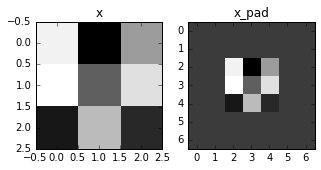

In [3]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

**预期输出**:

<table>
    <tr>
        <td>
            **x.shape**:
        </td>
        <td>
           (4, 3, 3, 2)
        </td>
    </tr>
        <tr>
        <td>
            **x_pad.shape**:
        </td>
        <td>
           (4, 7, 7, 2)
        </td>
    </tr>
        <tr>
        <td>
            **x[1,1]**:
        </td>
        <td>
           [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
        </td>
    </tr>
        <tr>
        <td>
            **x_pad[1,1]**:
        </td>
        <td>
           [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
        </td>
    </tr>

</table>

#### 12.3.2 单步卷积

这节我们需要实现单步卷积，即将过滤器应用在输入的一个给定位置。单步卷积会用来构建一个卷积单元，卷积单元的作用是：

- 取一个输入立方体
- 将过滤器应用到输入的每个给定位置
- 输出另一个立方体（通常会发生尺寸改变）

<img src="img/Convolution_schematic.gif" style="width:500px;height:300px;">
<caption><center> <u> <font color='purple'> **Figure 2** </u><font color='purple'>  : **Convolution operation**<br> with a filter of 2x2 and a stride of 1 (stride = amount you move the window each time you slide) </center></caption>

在计算机视觉应用中，左边矩阵中的每个值都对应着一个像素值。卷积的过程中，这个 3x3 的过滤器依次和原矩阵中对应位置做元素相乘，再求和，然后加上截距项。首先，我们要实现单步卷积，对应着将过滤器和矩阵中一个位置进行计算，并获得唯一实数值的过程。

之后，我们会使用这个函数，对输入的不同位置进行计算，从而实现完整的卷积过程。

**练习**: 实现 conv_single_step(). [提示](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html).


In [4]:
# GRADED FUNCTION: conv_single_step

def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, result of convolving the sliding window (W, b) on a slice x of the input data
    """

    ### START CODE HERE ### (≈ 2 lines of code)
    # Element-wise product between a_slice and W. Do not add the bias yet.
    s = a_slice_prev * W
    # Sum over all entries of the volume s.
    Z = np.sum(s)
    # Add bias b to Z. Cast b to a float() so that Z results in a scalar value.
    Z = Z + float(b)
    ### END CODE HERE ###

    return Z

In [5]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.99908945068


**预期输出**:
<table>
    <tr>
        <td>
            **Z**
        </td>
        <td>
            -6.99908945068
        </td>
    </tr>

</table>

#### 12.3.3 卷积神经网络：前向传播

在前向传播的过程中，我们需要接收多个过滤器，并使用它们对输入进行卷积过程的计算。每个过滤器产生的卷积都会输出一个2D矩阵。将这些矩阵叠加起来，就得到了一个3D的立方体：

<center>
<video width="620" height="440" src="img/conv_kiank.mp4" type="video/mp4" controls>
</video>
</center>

**练习**: 实现下面的函数，将一组过滤器 W 应用到输入 A_prev。A_prev 是上一层的激活输出值（包括共 m 个样本），W 表示过滤器/权重，b 表示截距向量，每个过滤器都有自己单独的解决。我们也可以访问超参字典，获取补全量和步长。

**提示**: 
1. 要在矩阵 "a_prev" (shape (5,5,3)) 中选取左上角 2×2 的子矩阵，可以使用：
```python
a_slice_prev = a_prev[0:2,0:2,:]
```
在下面定义 `a_slice_prev` 时，定义 `start/end` 索引，在使用上面的方法即可。
2. 要定义 a_slice，首先需要定义其四个角的坐标 `vert_start`, `vert_end`, `horiz_start` 和 `horiz_end`。下面的图展示了如果使用 h, w, f 和 s 来计算这四个坐标。

<img src="img/vert_horiz_kiank.png" style="width:400px;height:300px;">
<caption><center> <u> <font color='purple'> **Figure 3** </u><font color='purple'>  : **Definition of a slice using vertical and horizontal start/end (with a 2x2 filter)** <br> This figure shows only a single channel.  </center></caption>


**提醒**:
输出尺寸和输入尺寸的关系如下：
$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{卷积中使用的过滤器数量}$$

在这个练习中，我们不考虑向量化，仅简单使用for循环来实现。

In [6]:
# GRADED FUNCTION: conv_forward

def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    
    ### START CODE HERE ###
    # Retrieve dimensions from A_prev's shape (≈1 line)  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape (≈1 line)
    (f, f, n_C_prev, n_C) = W.shape
    
    # Retrieve information from "hparameters" (≈2 lines)
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    # Compute the dimensions of the CONV output volume using the formula given above. Hint: use int() to floor. (≈2 lines)
    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1
    
    # Initialize the output volume Z with zeros. (≈1 line)
    Z = np.zeros((m, n_H, n_W, n_C))
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):                               # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i]                              # Select ith training example's padded activation
        for h in range(n_H):                           # loop over vertical axis of the output volume
            for w in range(n_W):                       # loop over horizontal axis of the output volume
                for c in range(n_C):                   # loop over channels (= #filters) of the output volume
                    
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈1 line)
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[:,:,:,c], b[:,:,:,c])
                    
    ### END CODE HERE ###
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [7]:
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =", np.mean(Z))
print("Z[3,2,1] =", Z[3,2,1])
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

Z's mean = 0.0489952035289
Z[3,2,1] = [-0.61490741 -6.7439236  -2.55153897  1.75698377  3.56208902  0.53036437
  5.18531798  8.75898442]
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


**预期输出**:

<table>
    <tr>
        <td>
            **Z's mean**
        </td>
        <td>
            0.0489952035289
        </td>
    </tr>
    <tr>
        <td>
            **Z[3,2,1]**
        </td>
        <td>
            [-0.61490741 -6.7439236  -2.55153897  1.75698377  3.56208902  0.53036437
  5.18531798  8.75898442]
        </td>
    </tr>
    <tr>
        <td>
            **cache_conv[0][1][2][3]**
        </td>
        <td>
            [-0.20075807  0.18656139  0.41005165]
        </td>
    </tr>

</table>


最后，卷积层还包括激活函数，如果我们要添加激活逻辑的话，可以使用下面的代码：
```python
# Convolve the window to get back one output neuron
Z[i, h, w, c] = ...
# Apply activation
A[i, h, w, c] = activation(Z[i, h, w, c])
```

这里，我们先不需要进行激活操作。


### 12.4 池化层

池化层会缩减输入的高度和宽度，在减少计算量的同时，也使得特征检测对于特征在输入图像中的位置不那么敏感。池化层包括两大类型：

- 最大池化层：($f, f$) 的滑动窗口，针对输入值进行滑动，将窗口中的最大值作为对应的输出。

- 平均池化层：($f, f$) 的滑动窗口，针对输入值进行滑动，将窗口中的平均值作为对应的输出。

<table>
<td>
<img src="img/max_pool1.png" style="width:500px;height:300px;">
<td>

<td>
<img src="img/a_pool.png" style="width:500px;height:300px;">
<td>
</table>

池化层对于反向传播来说，没有需要训练的参数。但池化层具有超参，即滑动窗口的大小 $f$ 和步长 $s$。

#### 12.4.1 前向池化
下面我们会在同一个函数中实现最大池化和平均池化。

**练习**: 实现池化层的前向传播

**提示**:
由于没有补全，下面的公式给出了通过输入尺寸来计算输出尺寸的方法：
$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$
$$ n_C = n_{C_{prev}}$$

In [8]:
# GRADED FUNCTION: pool_forward

def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Retrieve dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    ### START CODE HERE ###
    for i in range(m):                         # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    
                    # Compute the pooling operation on the slice. Use an if statment to differentiate the modes. Use np.max/np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    ### END CODE HERE ###
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [9]:
np.random.seed(1)
A_prev = np.random.randn(2, 4, 4, 3)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A =", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A)

mode = max
A = [[[[ 1.74481176  0.86540763  1.13376944]]]


 [[[ 1.13162939  1.51981682  2.18557541]]]]

mode = average
A = [[[[ 0.02105773 -0.20328806 -0.40389855]]]


 [[[-0.22154621  0.51716526  0.48155844]]]]


**预期输出:**
<table>

    <tr>
    <td>
    A  =
    </td>
        <td>
         [[[[ 1.74481176  0.86540763  1.13376944]]]


 [[[ 1.13162939  1.51981682  2.18557541]]]]

        </td>
    </tr>
    <tr>
    <td>
    A  =
    </td>
        <td>
         [[[[ 0.02105773 -0.20328806 -0.40389855]]]


 [[[-0.22154621  0.51716526  0.48155844]]]]

        </td>
    </tr>

</table>


到这里，我们就实现了卷积神经网络前向传播过程的所有层。接下来，我们会处理反向传播。

### 12.5 卷积神经网络中的反向传播

在现代深度学习框架中，我们通常只需要实现前向传播，框架会自行处理反向传播的过程，所以大部分深度学习工程师都不需要了解反向传播的详细机制。卷积神经网络的反向传播过程尤其复杂。这一节会简要介绍卷积神经网络的反向传播过程。

之前在实现简单（全连接）的神经网络时，反向传播是根据成本函数来计算偏导，从而更新参数。卷积神经网络也是类似的，只不过卷积神经网络的反向传播公式更难推导，这里我们会简要地展示在下面。

#### 12.5.1 卷积层的反向传播

首先实现卷积层的反向传播

##### 12.5.1.1 计算 dA:
下面是给定一个训练样本，对于某个特定的过滤器 $W_c$，计算 $dA$ 的公式：

$$ dA += \sum _{h=0} ^{n_H} \sum_{w=0} ^{n_W} W_c \times dZ_{hw} \tag{1}$$

其中$W_c$ 是过滤器， $dZ_{hw}$ 是一个标量，表示成本函数针对卷积层输入 Z 在第 h 行，w 列的梯度。每次，我们都用同样的过滤器 $W_c$ 乘以不同的 dZ，来更新dA。这主要是因为，在前向传播过程中，每次过滤器都是点乘一个区间再求和。而计算 dA 的过程中，我们将这个区间内的梯度相加。

上面的公式，转换为相应for循环内的代码：
```python
da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
```

##### 12.5.1.2 计算 dW:
下面是计算 $dW_c$ 的公式（$dW_c$ 是过滤器的梯度）：

$$ dW_c  += \sum _{h=0} ^{n_H} \sum_{w=0} ^ {n_W} a_{slice} \times dZ_{hw}  \tag{2}$$

其中 $a_{slice}$ 表示用来生成激活值 $Z_{ij}$ 的区间。因此，这里最终给了我们针对这个区间计算 $W$ 的梯度的公式。由于是同一个 $W$，全部相加就得到了 $dW$。

Where $a_{slice}$ corresponds to the slice which was used to generate the acitivation $Z_{ij}$. Hence, this ends up giving us the gradient for $W$ with respect to that slice. Since it is the same $W$, we will just add up all such gradients to get $dW$. 

上面的公式，转换为相应for循环内的代码：
```python
dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
```

##### 12.5.1.3 计算 db:
下面是针对过滤器 $W_c$ 对成本函数计算 $db$ 的公式：

$$ db = \sum_h \sum_w dZ_{hw} \tag{3}$$

和普通神经网络一样，db 是通过对 $dZ$ 求和来计算的。在卷积的情况下，我们对计算输入 Z 的所有卷积求和。

上面的公式，转换为相应for循环内的代码：
```python
db[:,:,:,c] += dZ[i, h, w, c]
```

**练习**: 实现下面的 `conv_backward` 函数。这里需要对所有训练样本、过滤器、高度和宽度求和。请使用上面的公式1,2,3。

In [10]:
def conv_backward(dZ, cache):
    """
    Implement the backward propagation for a convolution function
    
    Arguments:
    dZ -- gradient of the cost with respect to the output of the conv layer (Z), numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward(), output of conv_forward()
    
    Returns:
    dA_prev -- gradient of the cost with respect to the input of the conv layer (A_prev),
               numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    dW -- gradient of the cost with respect to the weights of the conv layer (W)
          numpy array of shape (f, f, n_C_prev, n_C)
    db -- gradient of the cost with respect to the biases of the conv layer (b)
          numpy array of shape (1, 1, 1, n_C)
    """
    
    ### START CODE HERE ###
    # Retrieve information from "cache"
    (A_prev, W, b, hparameters) = cache
    
    # Retrieve dimensions from A_prev's shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape
    (f, f, n_C_prev, n_C) = W.shape
    
    # Retrieve information from "hparameters"
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    # Retrieve dimensions from dZ's shape
    (m, n_H, n_W, n_C) = dZ.shape
    
    # Initialize dA_prev, dW, db with the correct shapes
    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))                           
    dW = np.zeros((f, f, n_C_prev, n_C))
    db = np.zeros((1, 1, 1, n_C))

    # Pad A_prev and dA_prev
    A_prev_pad = zero_pad(A_prev, pad)
    dA_prev_pad = zero_pad(dA_prev, pad)
    
    for i in range(m):                       # loop over the training examples
        
        # select ith training example from A_prev_pad and dA_prev_pad
        a_prev_pad = A_prev_pad[i]
        da_prev_pad = dA_prev_pad[i]
        
        for h in range(n_H):                   # loop over vertical axis of the output volume
            for w in range(n_W):               # loop over horizontal axis of the output volume
                for c in range(n_C):           # loop over the channels of the output volume
                    
                    # Find the corners of the current "slice"
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # Use the corners to define the slice from a_prev_pad
                    a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]

                    # Update gradients for the window and the filter's parameters using the code formulas given above
                    da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
                    dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
                    db[:,:,:,c] += dZ[i, h, w, c]
                    
        # Set the ith training example's dA_prev to the unpaded da_prev_pad (Hint: use X[pad:-pad, pad:-pad, :])
        dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :]
    ### END CODE HERE ###
    
    # Making sure your output shape is correct
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    
    return dA_prev, dW, db

In [11]:
np.random.seed(1)
dA, dW, db = conv_backward(Z, cache_conv)
print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))

dA_mean = 1.45243777754
dW_mean = 1.72699145831
db_mean = 7.83923256462


** 预期输出: **
<table>
    <tr>
        <td>
            **dA_mean**
        </td>
        <td>
            1.45243777754
        </td>
    </tr>
    <tr>
        <td>
            **dW_mean**
        </td>
        <td>
            1.72699145831
        </td>
    </tr>
    <tr>
        <td>
            **db_mean**
        </td>
        <td>
            7.83923256462
        </td>
    </tr>

</table>


#### 12.5.2 池化层的反向传播

接下来，我们需要实现池化层的反向传播。首先我们处理最大池化层。尽管对于反向传播来说，池化层没有需要更新的参数，我们计算反向传播时，依然需要计算这一层的梯度，这样才能继续计算上一层的梯度。

##### 12.5.2.1 最大池化层的反向传播

在开始池化层的反向传播之前，我们需要构建一个辅助函数 `create_mask_from_window()`，进行如下转换：

$$ X = \begin{bmatrix}
1 && 3 \\
4 && 2
\end{bmatrix} \quad \rightarrow  \quad M =\begin{bmatrix}
0 && 0 \\
1 && 0
\end{bmatrix}\tag{4}$$

这个函数创建了一个“掩码”矩阵，记录矩阵中最大值的位置。真值（1）表示最大值在矩阵 X 中所在的位置，其它的值都应该为假（0）。平均池化层后面也会用一个类似但不同的掩码矩阵。

**练习**: 实现 `create_mask_from_window()`。
提示:
- [np.max()]() 可以计算数组中的最大值
- 给定矩阵 X 和标量 x: `A = (X == x)` 会返回和 X 同样大小的矩阵 A，使:
```
A[i,j] = True if X[i,j] = x
A[i,j] = False if X[i,j] != x
```
- 这里我们不必考虑矩阵中存在多个取最大值的元素的情况。

In [12]:
def create_mask_from_window(x):
    """
    Creates a mask from an input matrix x, to identify the max entry of x.
    
    Arguments:
    x -- Array of shape (f, f)
    
    Returns:
    mask -- Array of the same shape as window, contains a True at the position corresponding to the max entry of x.
    """
    
    ### START CODE HERE ### (≈1 line)
    mask = x == np.max(x)
    ### END CODE HERE ###
    
    return mask

In [13]:
np.random.seed(1)
x = np.random.randn(2,3)
mask = create_mask_from_window(x)
print('x = ', x)
print("mask = ", mask)

x =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
mask =  [[ True False False]
 [False False False]]


**预期输出:** 

<table> 
<tr> 
<td>

**x =**
</td>

<td>

[[ 1.62434536 -0.61175641 -0.52817175] <br>
 [-1.07296862  0.86540763 -2.3015387 ]]

  </td>
</tr>

<tr> 
<td>
**mask =**
</td>
<td>
[[ True False False] <br>
 [False False False]]
</td>
</tr>


</table>

##### 12.5.2.2 平均池化层的反向传播

在最大池化中，对每个输入窗口，输出仅仅来自输入窗口中最大的那个值的影响。而在平均池化中，输入窗口中的每个元素对输出都有同等的影响。

比如我们用 2x2 的过滤器来计算平均池化的前向传播，则方向传播过程中会用到的掩码为：
$$ dZ = 1 \quad \rightarrow  \quad dZ =\begin{bmatrix}
1/4 && 1/4 \\
1/4 && 1/4
\end{bmatrix}\tag{5}$$

这表明矩阵 $dZ$ 中的每个位置对输出都有同等影响。

**练习**: 实现下面的函数，来平均分布 dz 到矩阵的各个维度中. [提示](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ones.html)

In [14]:
def distribute_value(dz, shape):
    """
    Distributes the input value in the matrix of dimension shape
    
    Arguments:
    dz -- input scalar
    shape -- the shape (n_H, n_W) of the output matrix for which we want to distribute the value of dz
    
    Returns:
    a -- Array of size (n_H, n_W) for which we distributed the value of dz
    """
    
    ### START CODE HERE ###
    # Retrieve dimensions from shape (≈1 line)
    (n_H, n_W) = shape
    
    # Compute the value to distribute on the matrix (≈1 line)
    average = np.ones((n_H, n_W))
    
    # Create a matrix where every entry is the "average" value (≈1 line)
    a = average * dz / (n_H * n_W)
    ### END CODE HERE ###
    
    return a

**预期输出**: 

<table> 
<tr> 
<td>
distributed_value =
</td>
<td>
[[ 0.5  0.5]
<br\> 
[ 0.5  0.5]]
</td>
</tr>
</table>

##### 12.5.2.3 完整的池化层反向传播

现在我们已经有了计算池化层反向传播的所有组件。

**练习**: 实现不同模式下（`"max"` 和 `"average"`）的函数 `pool_backward`。这里会用到四层循环（对训练样本、高度、宽度、通道）。使用 `if/elif` 语句来判断模式。如果是 'average'，则使用 `distribute_value()`，得到和 `a_slice` 同样大小的矩阵。 否则使用 `create_mask_from_window()`，并和对应的 dZ相乘。

In [15]:
def pool_backward(dA, cache, mode = "max"):
    """
    Implements the backward pass of the pooling layer
    
    Arguments:
    dA -- gradient of cost with respect to the output of the pooling layer, same shape as A
    cache -- cache output from the forward pass of the pooling layer, contains the layer's input and hparameters 
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    dA_prev -- gradient of cost with respect to the input of the pooling layer, same shape as A_prev
    """
    
    ### START CODE HERE ###
    
    # Retrieve information from cache (≈1 line)
    (A_prev, hparameters) = cache
    
    # Retrieve hyperparameters from "hparameters" (≈2 lines)
    stride = hparameters["stride"]
    f = hparameters["f"]
    
    # Retrieve dimensions from A_prev's shape and dA's shape (≈2 lines)
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    m, n_H, n_W, n_C = dA.shape
    
    # Initialize dA_prev with zeros (≈1 line)
    dA_prev = np.zeros(A_prev.shape)
    
    for i in range(m):                       # loop over the training examples
        
        # select training example from A_prev (≈1 line)
        a_prev = A_prev[i]
        
        for h in range(n_H):                   # loop on the vertical axis
            for w in range(n_W):               # loop on the horizontal axis
                for c in range(n_C):           # loop over the channels (depth)
                    
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # Compute the backward propagation in both modes.
                    if mode == "max":
                        
                        # Use the corners and "c" to define the current slice from a_prev (≈1 line)
                        a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]
                        # Create the mask from a_prev_slice (≈1 line)
                        mask = create_mask_from_window(a_prev_slice)
                        # Set dA_prev to be dA_prev + (the mask multiplied by the correct entry of dA) (≈1 line)
                        dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += dA[i, h, w, c] * mask
                        
                    elif mode == "average":
                        
                        # Get the value a from dA (≈1 line)
                        da = dA[i, h, w, c]
                        # Define the shape of the filter as fxf (≈1 line)
                        shape = (f, f)
                        # Distribute it to get the correct slice of dA_prev. i.e. Add the distributed value of da. (≈1 line)
                        dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += distribute_value(da, shape)
                        
    ### END CODE ###
    
    # Making sure your output shape is correct
    assert(dA_prev.shape == A_prev.shape)
    
    return dA_prev

In [16]:
np.random.seed(1)
A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride" : 1, "f": 2}
A, cache = pool_forward(A_prev, hparameters)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = pool_backward(dA, cache, mode = "max")
print("mode = max")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1])
print()
dA_prev = pool_backward(dA, cache, mode = "average")
print("mode = average")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1])

mode = max
mean of dA =  0.145713902729
dA_prev[1,1] =  [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]

mode = average
mean of dA =  0.145713902729
dA_prev[1,1] =  [[ 0.08485462  0.2787552 ]
 [ 1.26461098 -0.25749373]
 [ 1.17975636 -0.53624893]]


**预期输出**: 

mode = max:
<table> 
<tr> 
<td>

**mean of dA =**
</td>

<td>

0.145713902729

  </td>
</tr>

<tr> 
<td>
**dA_prev[1,1] =** 
</td>
<td>
[[ 0.          0.        ] <br>
 [ 5.05844394 -1.68282702] <br>
 [ 0.          0.        ]]
</td>
</tr>
</table>

mode = average
<table> 
<tr> 
<td>

**mean of dA =**
</td>

<td>

0.145713902729

  </td>
</tr>

<tr> 
<td>
**dA_prev[1,1] =** 
</td>
<td>
[[ 0.08485462  0.2787552 ] <br>
 [ 1.26461098 -0.25749373] <br>
 [ 1.17975636 -0.53624893]]
</td>
</tr>
</table>

#### 恭喜 !

这样，实现完所有卷积神经网络的组件，我们就更加了解了卷积神经网络的机制。在下个练习中，我们会使用Tensorflow来实现卷积神经网络。

## 13. 卷积神经网络：应用

在这部分，我们将会:

- 实现一些辅助函数，帮助我们更好地实现Tensorflow模型
- 使用Tensorflow实现一个功能完备的卷积神经网络

**这部分的内容将教会我们**

- 使用Tensorflow构建并训练卷积神经网络，来解决分类问题

### 13.0 Tensorflow 模型

上一节中，我们使用numpy来实现了一些卷积神经网络的辅助函数，从而更好第了解卷积神经网络背后的运行机制。而如今，绝大多数深度学习的实际应用都是基于编程框架来构建的，这些编程框架提供了很多自带的函数，我们只需要调用就可以了。

首先，我们需要引入相关包

In [17]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

In [18]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

提示一下，SIGNS数据集是一组手势的图片集，表示从0到5这6个数字。

<img src="img/SIGNS.png" style="width:800px;height:300px;">

下面我们会给定一个打标的训练集的展示，可以修改 `index` 的值来重跑看看不同的结果。

y = 2


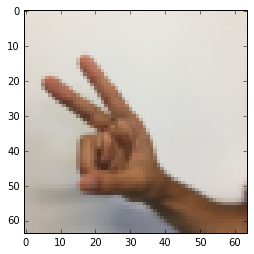

In [19]:
# Example of a picture
index = 6
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

在课程2中，我们曾经对这组数据构建了一个全连接层的神经网络。但考虑到这是一个图像数据集，用卷积神经网络是更为自然的选择。

开始之前，我们先确定数据的形状。

In [20]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


### 13.1 创建占位符

Tensorflow要求我们为输入数据创建占位符（placeholders），之后在运行session时，再填充数据给模型。

**练习**: 实现下面的函数，来为输入图像 $X$ 和 输出 $Y$ 创建占位符。在这个阶段，我们无法需要定义训练样本的数量。我们可以将批次大小设置为None，到后面再进行设置。因此，这时 X 的维度为 **[None, n_H0, n_W0, n_C0]** 而Y的维度为 **[None, n_y]**.  [提示](https://www.tensorflow.org/api_docs/python/tf/placeholder).

In [21]:
# GRADED FUNCTION: create_placeholders

def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """

    ### START CODE HERE ### (≈2 lines)
    X = tf.placeholder(tf.float32, shape=[None, n_H0, n_W0, n_C0])
    Y = tf.placeholder(tf.float32, shape=[None, n_y])
    ### END CODE HERE ###
    
    return X, Y

In [22]:
X, Y = create_placeholders(64, 64, 3, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(?, 64, 64, 3), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(?, 6), dtype=float32)


**预期输出**

<table> 
<tr>
<td>
    X = Tensor("Placeholder:0", shape=(?, 64, 64, 3), dtype=float32)

</td>
</tr>
<tr>
<td>
    Y = Tensor("Placeholder_1:0", shape=(?, 6), dtype=float32)

</td>
</tr>
</table>

### 13.2 参数初始化

我们接下来会使用 `tf.contrib.layers.xavier_initializer(seed = 0)` 来初始化权重/过滤器 $W1$ 和 $W2$。这里我们不需要关心截距变量，很快我们会看到，Tensorflow自动处理了截距项。另外，我们也只需要初始化 conv2d 函数的权重/过滤器，Tensorflow会自动为全连接层初始化参数。

**练习:** 实现 initialize_parameters(). 每组过滤器的维度下面已经提供了。提醒，在Tensorflow中，要初始化一个维度为 [1,2,3,4] 的参数 $W$，使用：
```python
W = tf.get_variable("W", [1,2,3,4], initializer = ...)
```
[更多信息](https://www.tensorflow.org/api_docs/python/tf/get_variable).

In [23]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [4, 4, 3, 8]
                        W2 : [2, 2, 8, 16]
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    """
    
    tf.set_random_seed(1)                              # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 2 lines of code)
    W1 = tf.get_variable('W1', [4, 4, 3, 8], initializer=tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable('W2', [2, 2, 8, 16], initializer=tf.contrib.layers.xavier_initializer(seed = 0))
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [24]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1 = " + str(parameters["W1"].eval()[1,1,1]))
    print("W2 = " + str(parameters["W2"].eval()[1,1,1]))

W1 = [ 0.00131723  0.14176141 -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
W2 = [-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]


** 预期输出:**

<table> 

    <tr>
        <td>
        W1 = 
        </td>
        <td>
[ 0.00131723  0.14176141 -0.04434952  0.09197326  0.14984085 -0.03514394 <br>
 -0.06847463  0.05245192]
        </td>
    </tr>

    <tr>
        <td>
        W2 = 
        </td>
        <td>
[-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058 <br>
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228 <br>
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]
        </td>
    </tr>

</table>

### 13.3 前向传播

Tensorflow自带一些函数，可以用来实现卷积的过程。

- **tf.nn.conv2d(X,W1, strides = [1,s,s,1], padding = 'SAME'):** 给定输入 $X$，一组过滤器 $W1$, 这个函数会用 $W1$ 中所有的过滤器，以卷积过程应用到 X 上。第三个输入 ([1,f,f,1]) 代表过滤器针对输入的所有维度 (m, n_H_prev, n_W_prev, n_C_prev) 分别对应的步长。函数的完整文档可以参考[这里](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)

- **tf.nn.max_pool(A, ksize = [1,f,f,1], strides = [1,s,s,1], padding = 'SAME'):** 给定输入 A，这个函数会将大小为 (f, f) 的滑动窗口以步长 (s, s) 对输入实现最大池化。函数的完整文档可以参考[这里(https://www.tensorflow.org/api_docs/python/tf/nn/max_pool)

- **tf.nn.relu(Z1):** 计算 Z1（可以是任意维度）中所有元素的 ReLU 激活值。函数的完整文档可以参考[这里(https://www.tensorflow.org/api_docs/python/tf/nn/relu)

- **tf.contrib.layers.flatten(P)**: 给定输入 P，这个函数会将所有样本打散为1D，同时保留批次大小。它返回一个打散后的张量，维度为 [batch_size, k]。函数的完整文档可以参考[这里](https://www.tensorflow.org/api_docs/python/tf/contrib/layers/flatten)

- **tf.contrib.layers.fully_connected(F, num_outputs):** 给定打散后的输入 F，它返回全连接层计算后的输出。函数的完整文档可以参考[这里](https://www.tensorflow.org/api_docs/python/tf/contrib/layers/fully_connected)

上面的最后一个函数 (`tf.contrib.layers.fully_connected`)，这个全连接层会自动初始化权重，并随着模型训练，自动更新权重。因而我们不需要手动为全连接层初始化权重。

**练习**: 

实现下面的 `forward_propagation` 函数，来构建: `CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED` 的模型。我们需要使用上面说明的这些函数。

具体而言，我们将会对各个步骤使用一下超参：
     - Conv2D: 步长 1，同一补齐
     - ReLU
     - Max pool: 8 × 8 过滤器，8 × 8 步长，同一补齐
     - Conv2D: 步长 1，同一补齐
     - ReLU
     - Max pool: 4 × 4 过滤器，4 × 4 stride，同一补齐
     - 打散之前的输出
     - FULLYCONNECTED (FC) layer: 使用全连接层，最后不需要再跟非线性的激活函数。请不要在这里调用softmax函数。这里会输入6个神经元，之后作为输入传递给softmax。在Tensorflow中，softmax函数和成本函数一起，形成了单一的函数，我们会在计算成本时调用这个函数。

In [25]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    ### START CODE HERE ###
    # CONV2D: stride of 1, padding 'SAME'
    Z1 = tf.nn.conv2d(X, W1, [1, 1, 1, 1],'SAME')
    # RELU
    A1 = tf.nn.relu(Z1)
    # MAXPOOL: window 8x8, sride 8, padding 'SAME'
    P1 = tf.nn.max_pool(A1, [1, 8, 8, 1], [1, 8, 8, 1], 'SAME')
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1, W2, [1, 1, 1, 1], 'SAME')
    # RELU
    A2 = tf.nn.relu(Z2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, [1, 4, 4, 1], [1, 4, 4, 1], 'SAME')
    # FLATTEN
    P2 = tf.contrib.layers.flatten(P2)
    # FULLY-CONNECTED without non-linear activation function (not not call softmax).
    # 6 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
    Z3 = tf.contrib.layers.fully_connected(P2, 6, activation_fn=None)
    ### END CODE HERE ###

    return Z3

In [26]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)    
    a = sess.run(Z3, {X: np.random.randn(2,64,64,3), Y: np.random.randn(2,6)})
    print("Z3 = " + str(a))

Z3 = [[-0.44670227 -1.57208765 -1.53049231 -2.31013036 -1.29104376  0.46852064]
 [-0.17601591 -1.57972014 -1.4737016  -2.61672091 -1.00810647  0.5747785 ]]


**预期输出**:

<table> 
    <td> 
    Z3 =
    </td>
    <td>
    [[-0.44670227 -1.57208765 -1.53049231 -2.31013036 -1.29104376  0.46852064] <br>
 [-0.17601591 -1.57972014 -1.4737016  -2.61672091 -1.00810647  0.5747785 ]]
    </td>
</table>